## Analysis for Physically Implausible Decay of Diffusion Signals (PIDS)

In [1]:
import os
import mat73
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import PIDS_functions as pf
import skimage
from skimage import morphology
import cv2

In [2]:
# Change the following line for a new case
#data_address = 'C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//IRB17//pat083//master.mat'
#data_address2 = 'C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//IRB17//pat083//master3.mat'


data_address = 'C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//hybridSortedInput.mat'
data_address2 = 'C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//ohsu_registered.mat'

In [3]:
print('Loading data')
try:
    data = sio.loadmat(data_address)
except NotImplementedError:
    data = mat73.loadmat(data_address)
print('Data loaded')
print('Loading data')
try:
    data2 = sio.loadmat(data_address2)
except NotImplementedError:
    data2 = mat73.loadmat(data_address2)
print('Data loaded')

Loading data
Data loaded
Loading data
Data loaded


In [4]:
print(pf.color.BOLD + pf.color.GREEN + 'The variables in this data file are:' + pf.color.END)
for f in data.keys():
    try:
        print(f'{f} : {data[f].shape}')
    except:
        continue

The variables in this data file are:
hybrid_data : (128, 128, 18, 4, 4)
b : (4, 1)
TE : (4, 1)
TE_norm : (4, 1)
numSlices : (1, 1)
areScaled : (1, 1)
pixelSpacing : (2, 1)
fileVersion : (1,)


In [6]:
b_values = data['b']
TE_values = data['TE']
TE_norm = data['TE_norm']
hybrid_data = data['hybrid_data']
#cancer_mask = data['cancer_mask']
#benign_mask = data['benign_mask']
#hybrid_raw = data['hybrid_raw']
registered_hybrid = data2['registered_hybrid']

In [78]:
hybrid_raw_reshaped = hybrid_data.copy()
for b in range(4):
    for te in range(4):
        hybrid_raw_reshaped[:, :, :, b, te] = np.mean(hybrid_raw[b][te], -1) if b else hybrid_raw[b][te]

Calculating PIDS for slice 5


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

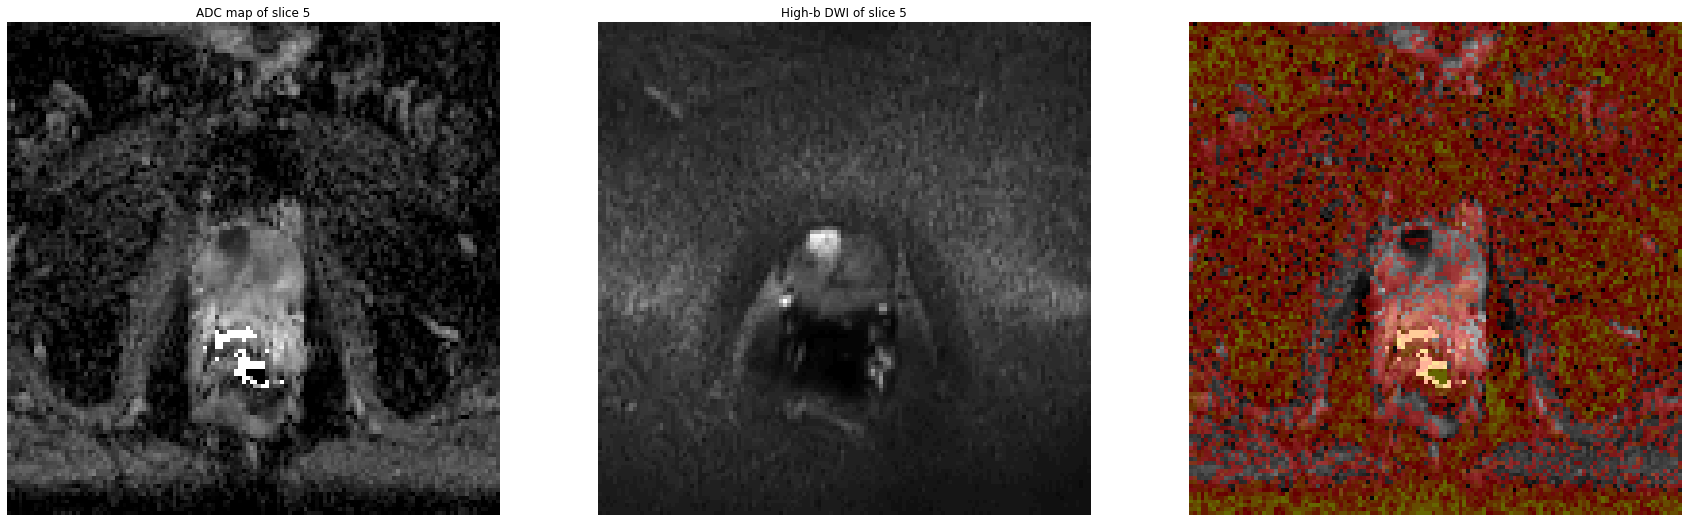

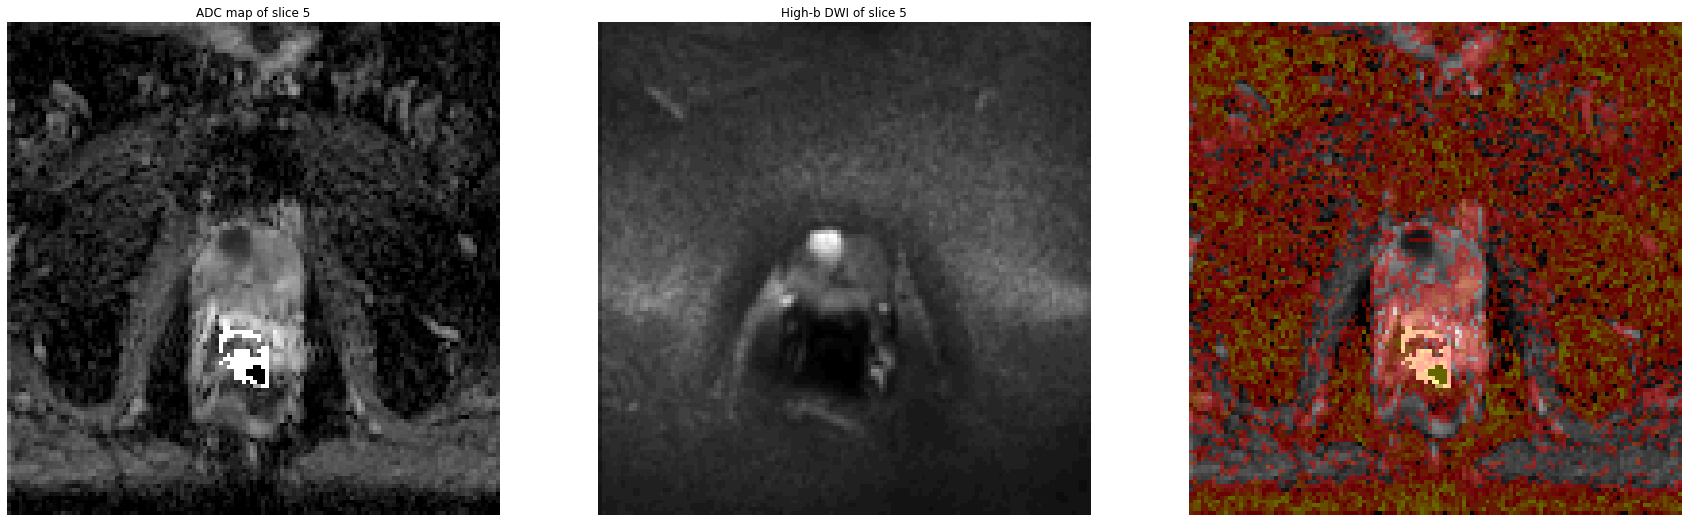

In [19]:
for sliceIndex in range(4,5):#hybrid_data.shape[2]):
    if True:#np.sum(cancer_mask[:, :, sliceIndex].flatten()):
        print(f'Calculating PIDS for slice {sliceIndex+1}')
        slicedata = np.squeeze(hybrid_data[:, :, sliceIndex, :, :])
        adc_map = pf.ADC_slice(b_values, hybrid_data[:,:, sliceIndex, :, 0])
        PIDS_1, PIDS_2, PIDS_3, PIDS_4 = pf.detect_PIDS_slice(b_values, hybrid_data[:,:, sliceIndex, :, :])
        fig, ax = plt.subplots(1,3, figsize = (30,10))
        ax[0].imshow(adc_map, cmap='gray')
        ax[0].set_title(f"ADC map of slice {sliceIndex + 1}")
        ax[0].axis('off')
        #cancer = skimage.filters.sobel(cancer_mask[:, :, sliceIndex])
        #cancer[cancer==0] = np.nan
        #ax[0].imshow(cancer, cmap='Reds',alpha = 0.4)
        #ax[0].axis('off')


        ax[1].imshow(hybrid_data[:,:, sliceIndex, 3, 0], cmap='gray')
        ax[1].set_title(f"High-b DWI of slice {sliceIndex + 1}")
        ax[1].axis('off')
        #ax[1].imshow(cancer, cmap='Reds',alpha = 0.4)
        ax[1].axis('off')

        ax[2].imshow(adc_map, cmap='gray', vmin=0.3, vmax=3)
        ax[2].axis('off')

        PIDS = PIDS_1.astype(float) + PIDS_2.astype(float)
        for i in range(0,1):
             for j in range(0,2):
                 PIDS += PIDS_3[:,:,i, j].astype(float)
                 PIDS += PIDS_4[:,:,i, j].astype(float)
        #num_cancer_voxels = cancer_mask[:, :, sliceIndex].sum()
        mask = PIDS#*cancer_mask[:, :, sliceIndex]
        mask = mask.astype(float)
        num_PIDS = (mask>0).astype(float).sum()
        mask[mask==0] = np.nan
        ax[2].imshow(mask, cmap='autumn',alpha = 0.4)
        ax[2].axis('off')
        #ax[2].set_title(f"PIDS percentage on the lesion: {num_PIDS/num_cancer_voxels:.2f}")

        # slicedata = np.squeeze(hybrid_raw_reshaped[:, :, sliceIndex, :, :])
        # adc_map = pf.ADC_slice(b_values, hybrid_raw_reshaped[:,:, sliceIndex, :, 0])
        # PIDS_1, PIDS_2, PIDS_3, PIDS_4 = pf.detect_PIDS_slice(b_values, hybrid_raw_reshaped[:,:, sliceIndex, :, :])
        # fig, ax = plt.subplots(1,3, figsize = (30,10))
        # ax[0].imshow(adc_map, cmap='gray')
        # ax[0].set_title(f"ADC map of slice {sliceIndex + 1}")
        # ax[0].axis('off')
        # cancer = skimage.filters.sobel(cancer_mask[:, :, sliceIndex])
        # cancer[cancer==0] = np.nan
        # ax[0].imshow(cancer, cmap='Reds',alpha = 0.4)
        # ax[0].axis('off')


        # ax[1].imshow(hybrid_raw_reshaped[:,:, sliceIndex, 3, 0], cmap='gray')
        # ax[1].set_title(f"High-b DWI of slice {sliceIndex + 1}")
        # ax[1].axis('off')
        # ax[1].imshow(cancer, cmap='Reds',alpha = 0.4)
        # ax[1].axis('off')

        # ax[2].imshow(adc_map, cmap='gray', vmin=0.3, vmax=3)
        # ax[2].axis('off')

        # PIDS = PIDS_1.astype(float) + PIDS_2.astype(float)
        # for i in range(0,4):
        #     for j in range(0,3):
        #         PIDS += PIDS_3[:,:,i, j].astype(float)
        #         PIDS += PIDS_4[:,:,i, j].astype(float)
        # num_cancer_voxels = cancer_mask[:, :, sliceIndex].sum()
        # mask = PIDS*cancer_mask[:, :, sliceIndex]
        # mask = mask.astype(float)
        # num_PIDS = (mask>0).astype(float).sum()
        # mask[mask==0] = np.nan
        # ax[2].imshow(mask, cmap='autumn',alpha = 0.4)
        # ax[2].axis('off')
        # ax[2].set_title(f"PIDS percentage on the lesion: {num_PIDS/num_cancer_voxels:.2f}")

        slicedata = np.squeeze(registered_hybrid[:, :, sliceIndex, :, :])
        adc_map = pf.ADC_slice(b_values, registered_hybrid[:,:, sliceIndex, :, 0])
        PIDS_1, PIDS_2, PIDS_3, PIDS_4 = pf.detect_PIDS_slice(b_values, registered_hybrid[:,:, sliceIndex, :, :])
        fig, ax = plt.subplots(1,3, figsize = (30,10))
        ax[0].imshow(adc_map, cmap='gray')
        ax[0].set_title(f"ADC map of slice {sliceIndex + 1}")
        ax[0].axis('off')
        #cancer = skimage.filters.sobel(cancer_mask[:, :, sliceIndex])
        #cancer[cancer==0] = np.nan
        #ax[0].imshow(cancer, cmap='Reds',alpha = 0.4)
        ax[0].axis('off')


        ax[1].imshow(registered_hybrid[:,:, sliceIndex, 3, 0], cmap='gray')
        ax[1].set_title(f"High-b DWI of slice {sliceIndex + 1}")
        ax[1].axis('off')
        #ax[1].imshow(cancer, cmap='Reds',alpha = 0.4)
        ax[1].axis('off')

        ax[2].imshow(adc_map, cmap='gray', vmin=0.3, vmax=3)
        ax[2].axis('off')

        PIDS = PIDS_1.astype(float) + PIDS_2.astype(float)
        for i in range(0,1):
             for j in range(0,2):
                 PIDS += PIDS_3[:,:,i, j].astype(float)
                 PIDS += PIDS_4[:,:,i, j].astype(float)
        #num_cancer_voxels = cancer_mask[:, :, sliceIndex].sum()
        mask = PIDS#*cancer_mask[:, :, sliceIndex]
        mask = mask.astype(float)
        num_PIDS = (mask>0).astype(float).sum()
        mask[mask==0] = np.nan
        ax[2].imshow(mask, cmap='autumn',alpha = 0.4)
        ax[2].axis('off')
        #ax[2].set_title(f"PIDS percentage on the lesion: {num_PIDS/num_cancer_voxels:.2f}")
        

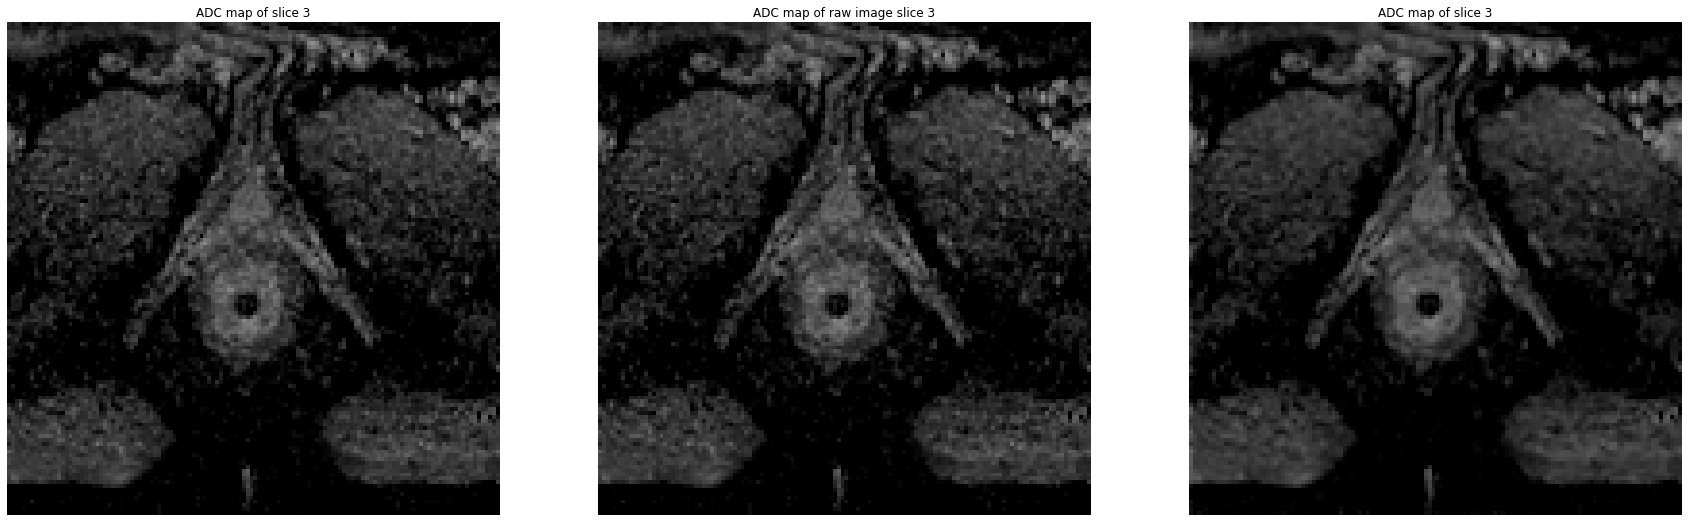

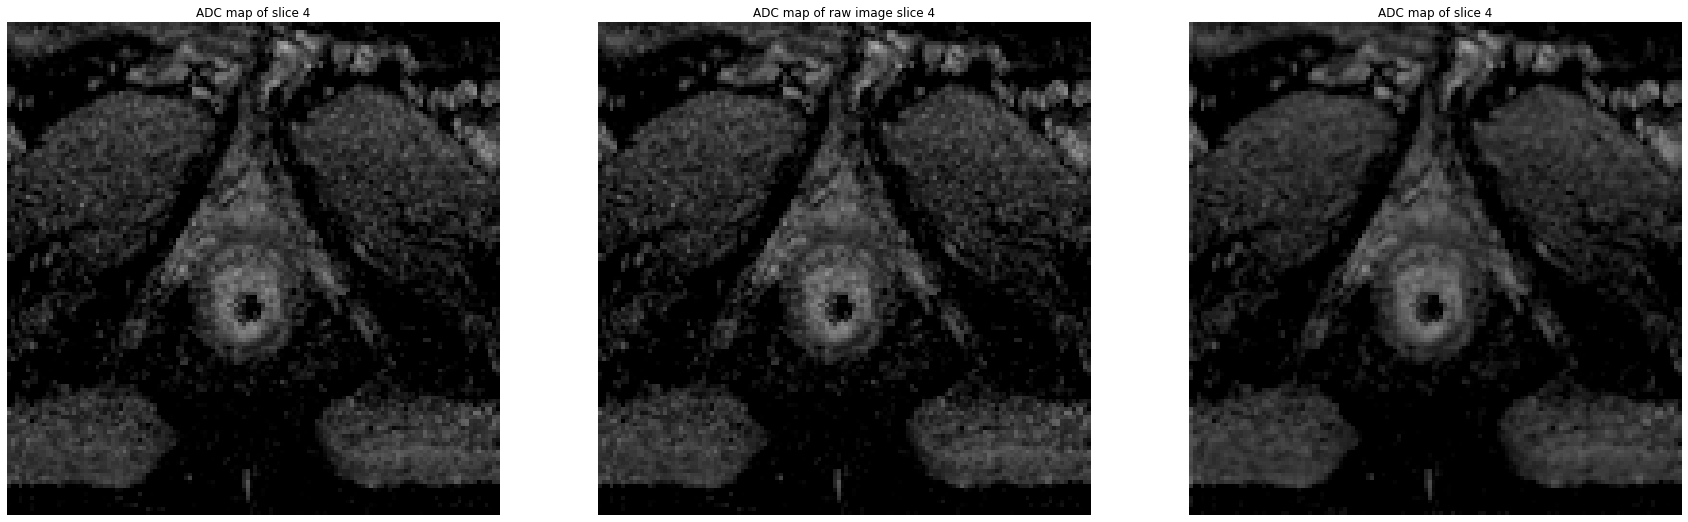

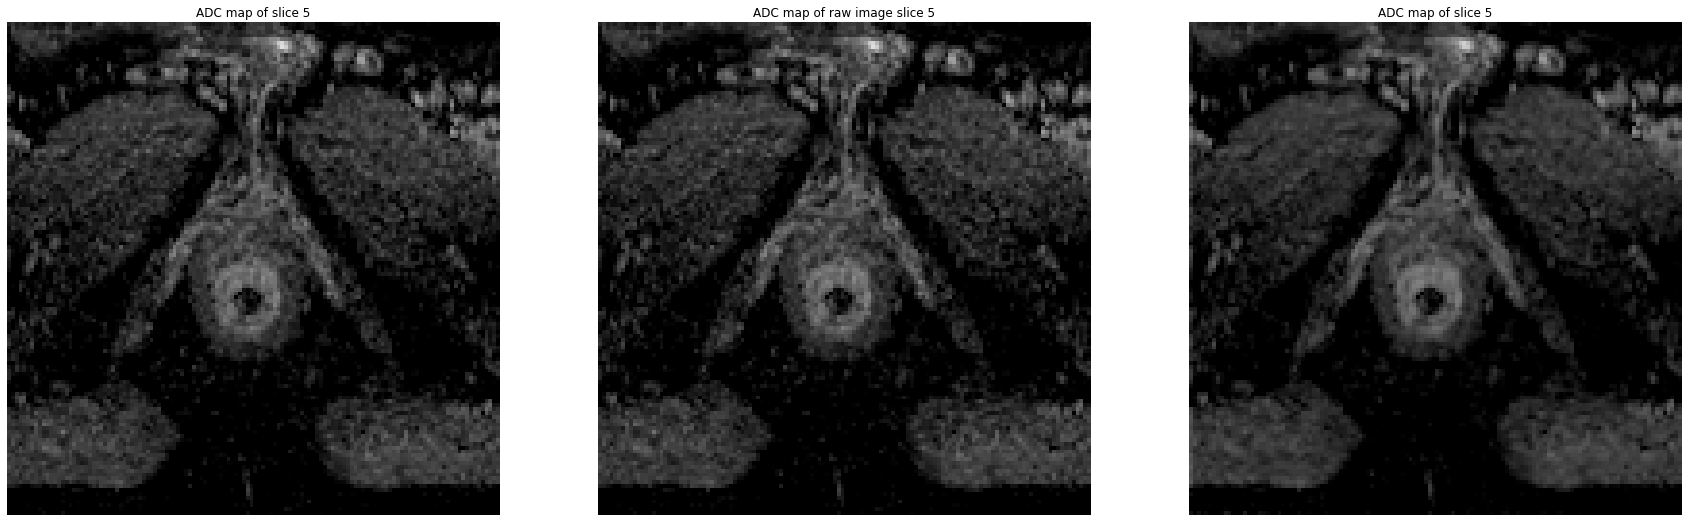

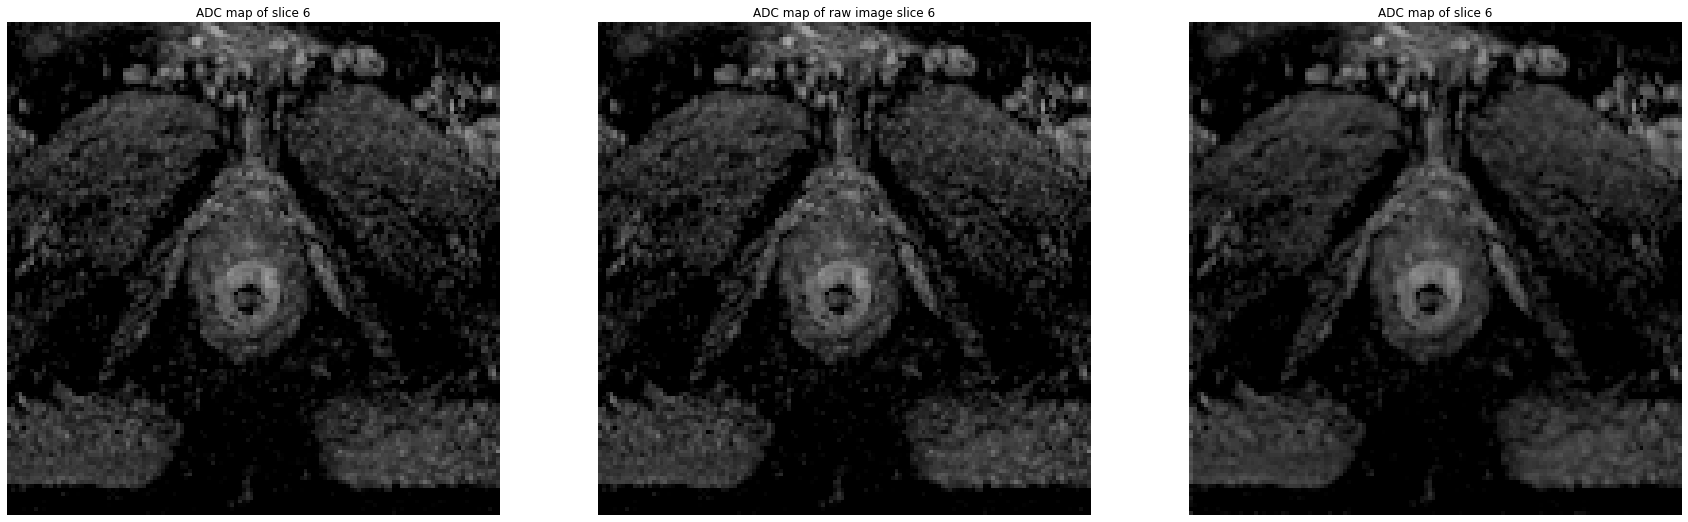

In [93]:
for sliceIndex in range(2,6):#hybrid_data.shape[2]):
    #if np.sum(cancer_mask[:, :, sliceIndex].flatten()):

    slicedata = np.squeeze(hybrid_data[:, :, sliceIndex, :, :])
    adc_map = pf.ADC_slice(b_values, hybrid_data[:,:, sliceIndex, :, 0])
    fig, ax = plt.subplots(1,3, figsize = (30,10))
    ax[0].imshow(adc_map, cmap='gray',vmin=0.3, vmax=3)
    ax[0].set_title(f"ADC map of slice {sliceIndex + 1}")
    ax[0].axis('off')
    

    #slicedata = np.squeeze(hybrid_raw_reshaped[:, :, sliceIndex, :, :])
    #adc_map = pf.ADC_slice(b_values, hybrid_raw_reshaped[:,:, sliceIndex, :, 0])
    
    
    ax[1].imshow(adc_map, cmap='gray',vmin=0.3, vmax=3)
    ax[1].set_title(f"ADC map of raw image slice {sliceIndex + 1}")
    ax[1].axis('off')
    

    slicedata = np.squeeze(registered_hybrid[:, :, sliceIndex, :, :])
    adc_map = pf.ADC_slice(b_values, registered_hybrid[:,:, sliceIndex, :, 0])
    
    ax[2].imshow(adc_map, cmap='gray',vmin=0.3, vmax=3)
    ax[2].set_title(f"ADC map of slice {sliceIndex + 1}")
    ax[2].axis('off')
        
        

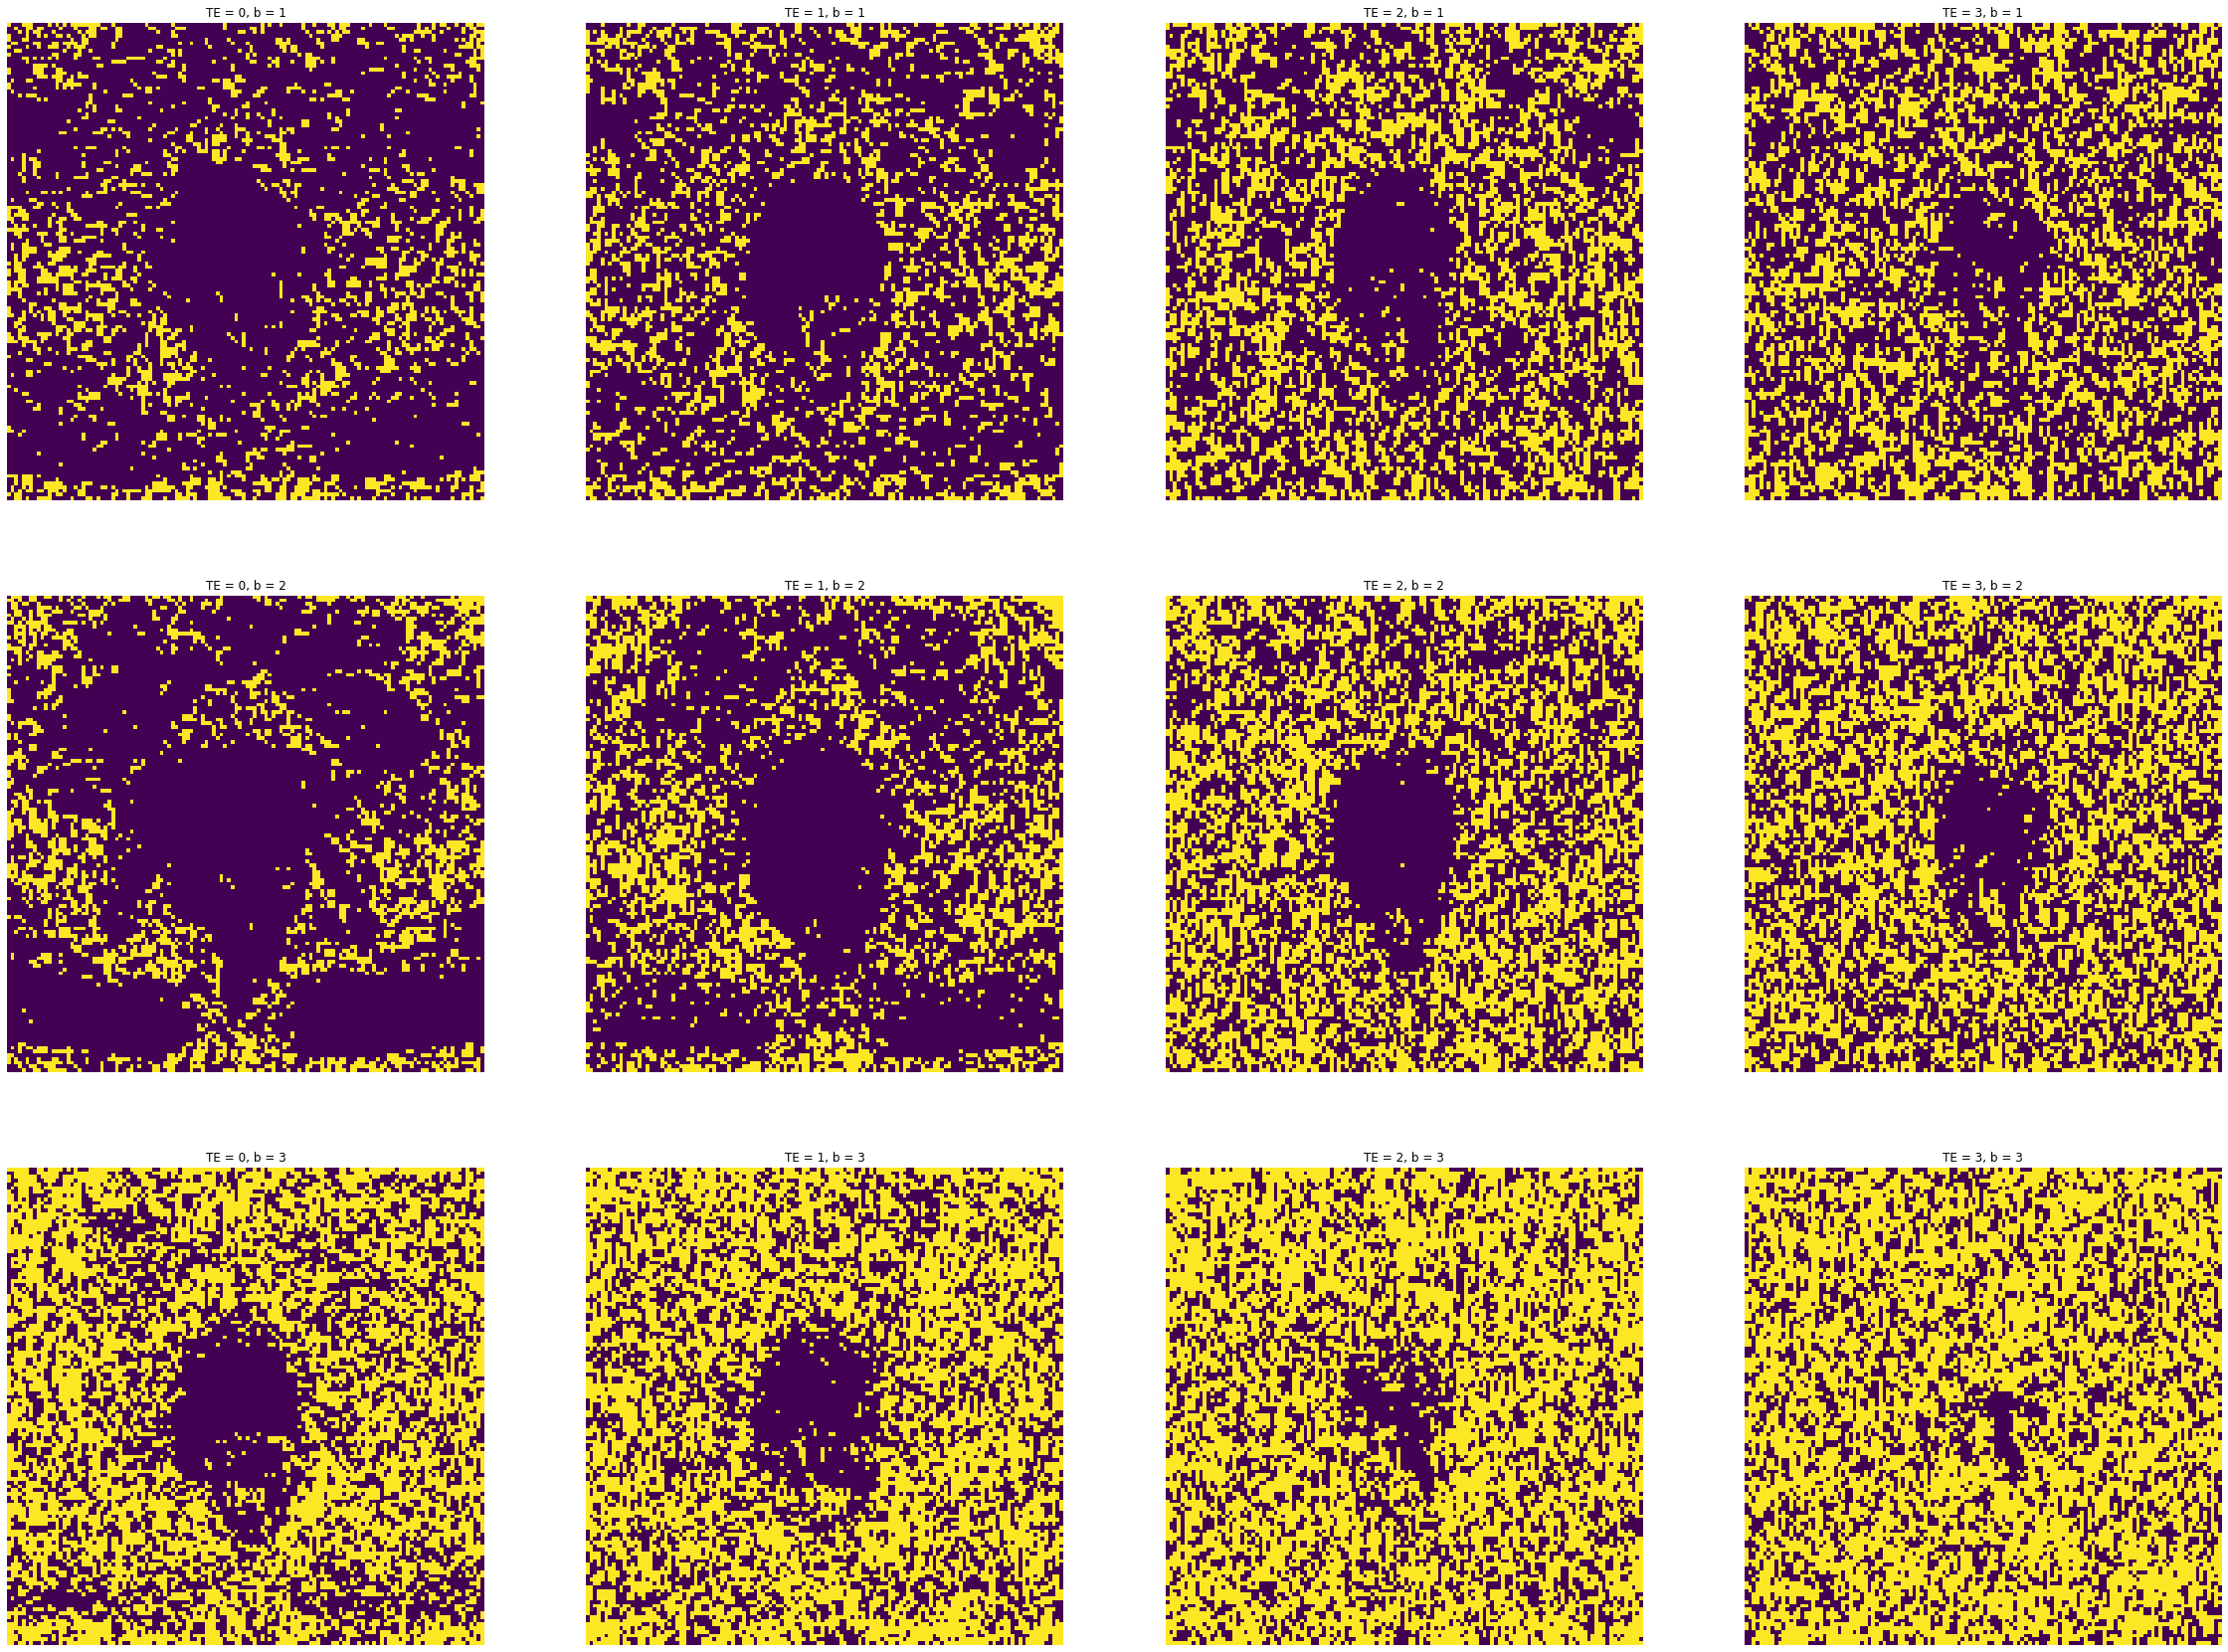

In [9]:
fig, ax = plt.subplots(3,4, figsize = (40,30))
for i in range(PIDS_3.shape[2]):
    for j in range(PIDS_3.shape[3]):
        ax[j][i].imshow(PIDS_3[:, :, i, j])
        ax[j][i].set_title(f"TE = {i}, b = {j+1}")
        ax[j][i].axis('off')


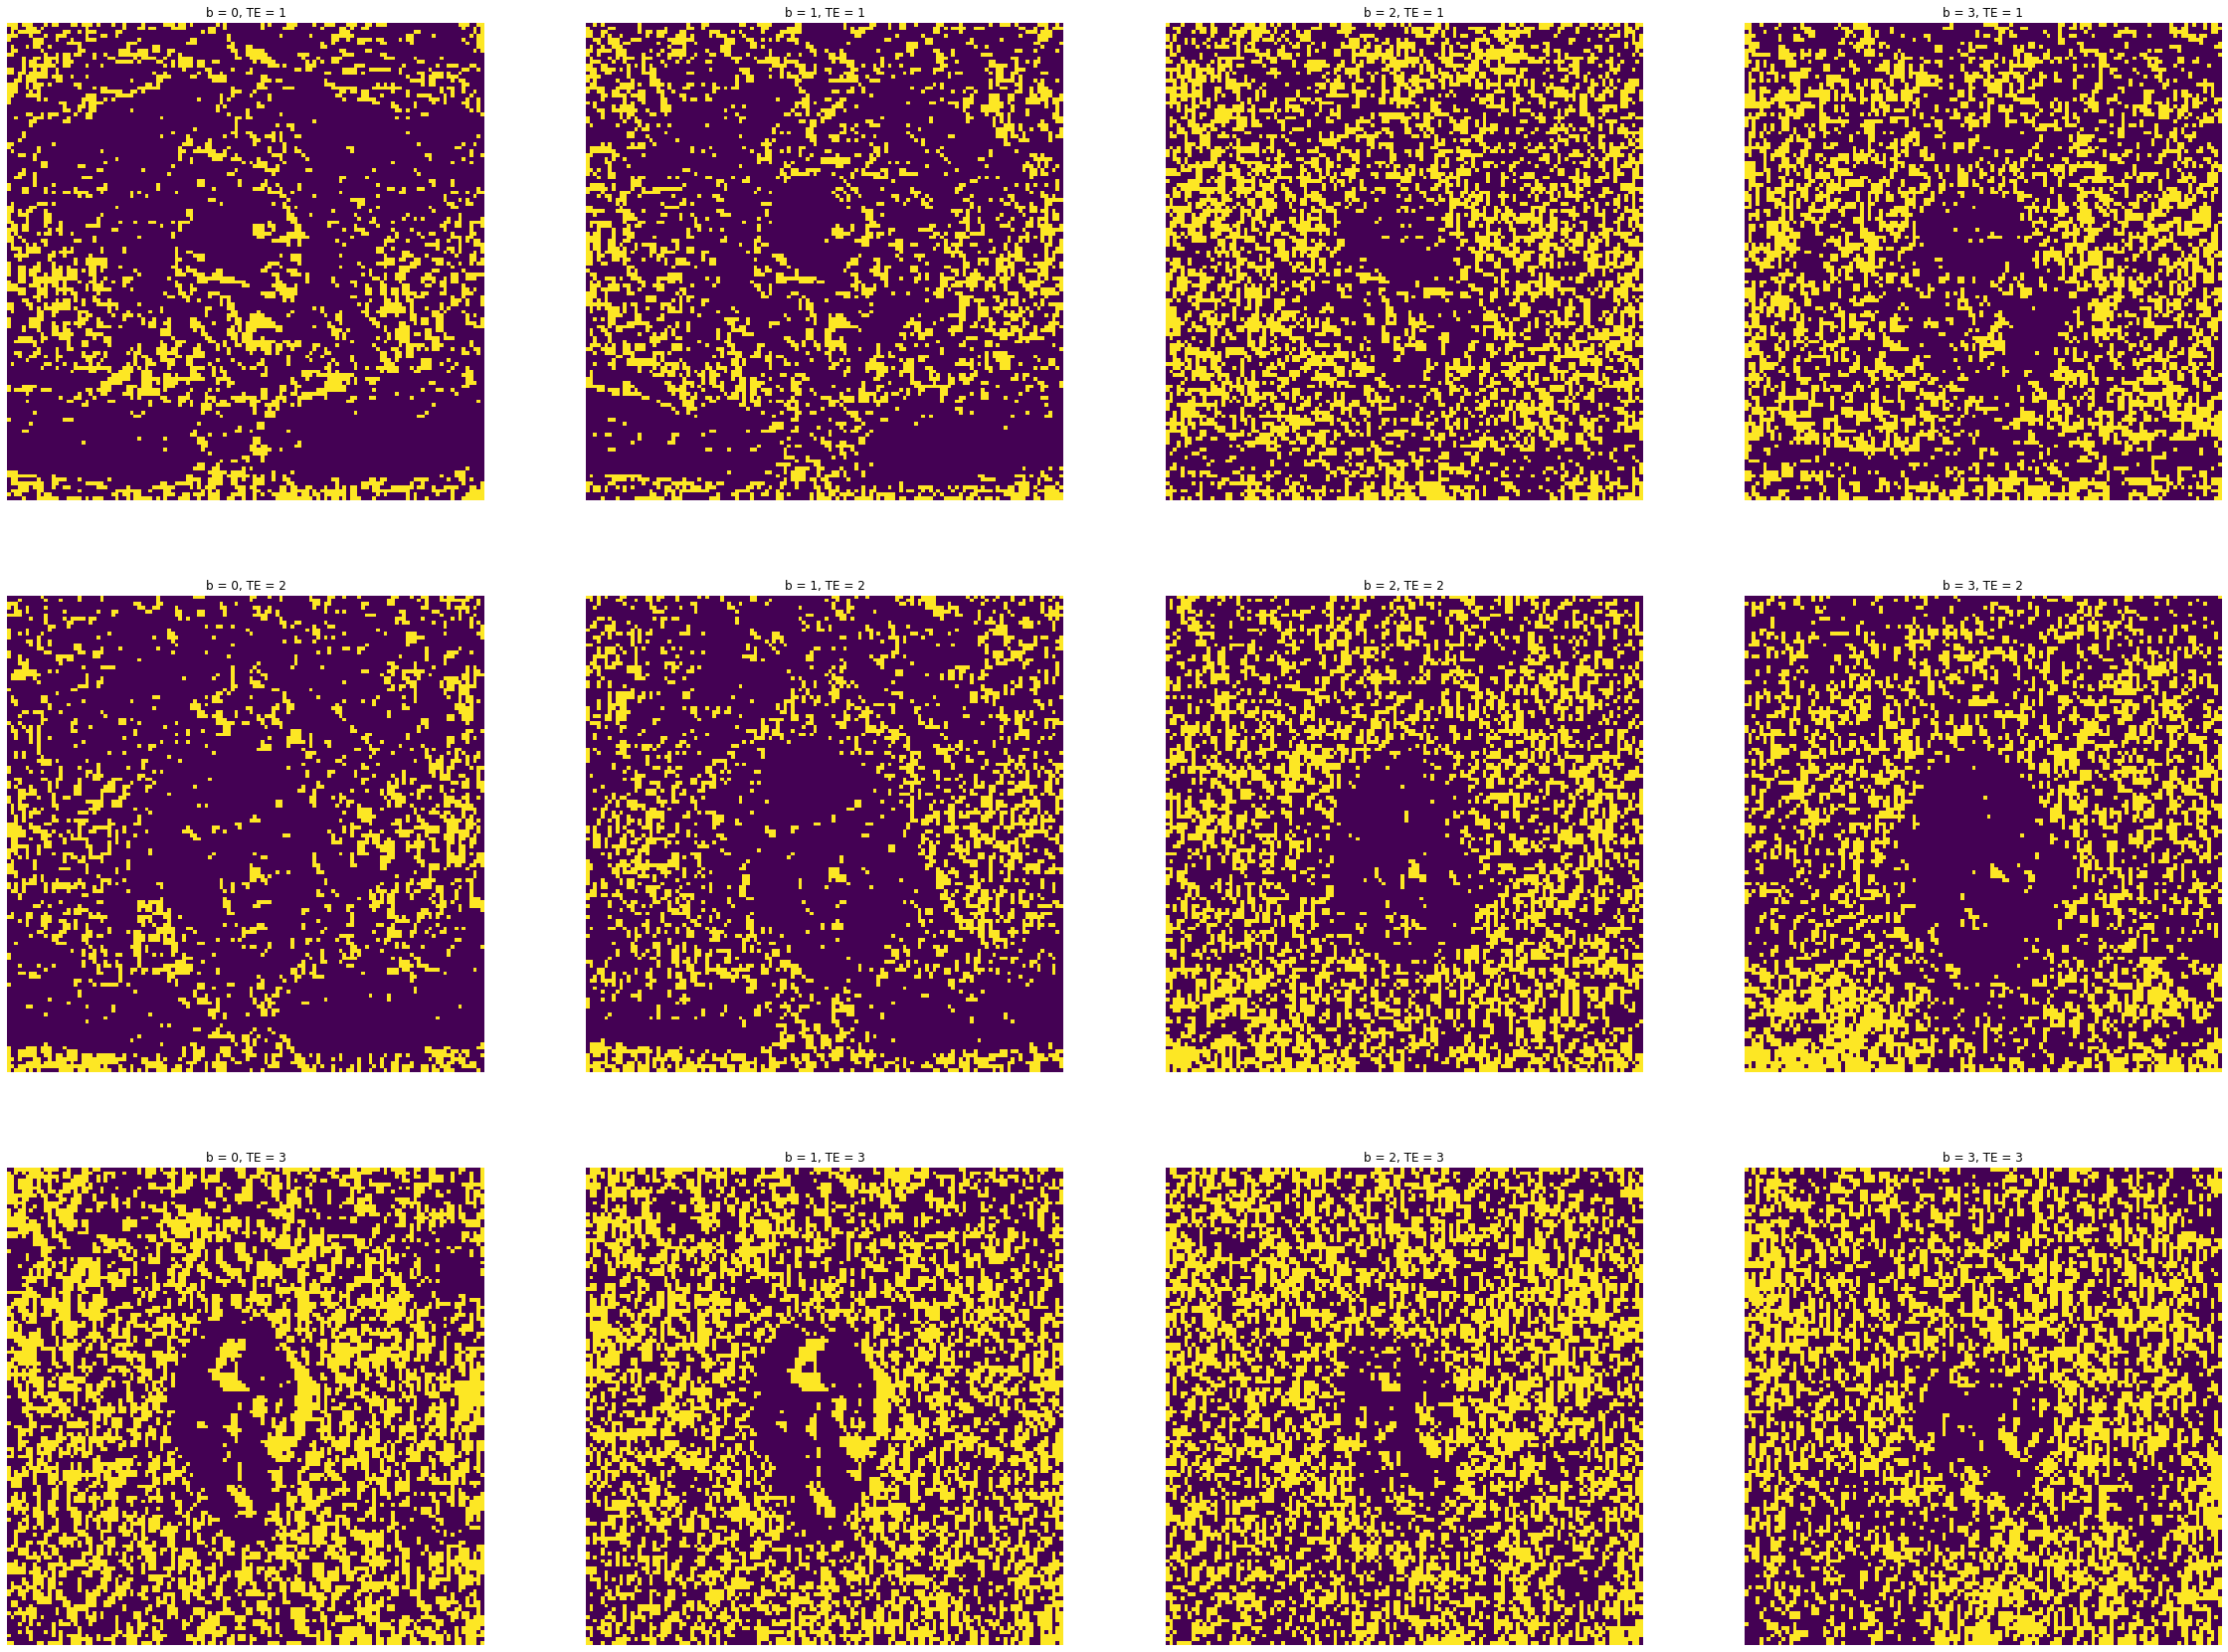

In [10]:

fig, ax = plt.subplots(3,4, figsize = (40,30))
for i in range(PIDS_4.shape[2]):
    for j in range(PIDS_4.shape[3]):
        ax[j][i].imshow(PIDS_4[:, :, i, j])
        ax[j][i].set_title(f"b = {i}, TE = {j+1}")
        ax[j][i].axis('off')

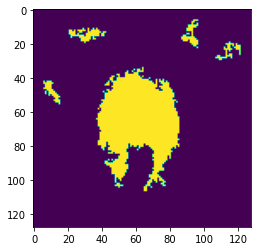

In [23]:
PIDS = PIDS_1.astype(float) + PIDS_2.astype(float)
for i in range(0,3):
     for j in range(0,2):
         PIDS += PIDS_3[:,:,i, j].astype(float)

PIDS = 1 - (PIDS>0).astype(float)
PIDS = morphology.remove_small_objects(PIDS.astype(bool), min_size=50, connectivity=50)
PIDS = morphology.remove_small_holes(PIDS, area_threshold=50, connectivity=1)
plt.imshow(PIDS)

